# **Import Libraries**
Load the necessary libraries for data manipulation model training, and evaluation.

In [191]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import numpy as np  # Importing numpy for numerical operations
import seaborn as sns  # Importing seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs

# Load Data

Read the dataset into a DataFrame

In [192]:
# Load the fertilizer prediction dataset from a CSV file
fertilizer_data = pd.read_csv('/content/fertilizer_prediction.csv')
fertilizer_data  # Display the loaded DataFrame

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10/26/2026
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [193]:
# Show the first five rows of the DataFrame to get an overview of the data
fertilizer_data.head()

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [194]:
# Check the shape of the DataFrame (number of rows and columns)
fertilizer_data.shape

(99, 9)

In [195]:
# Display information about the DataFrame, including the data types of each column
fertilizer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   temperature      99 non-null     int64 
 1   humidity         99 non-null     int64 
 2   moisture         99 non-null     int64 
 3   soil_type        99 non-null     object
 4   crop_type        99 non-null     object
 5   nitrogen         99 non-null     int64 
 6   potassium        99 non-null     int64 
 7   phosphorous      99 non-null     int64 
 8   fertilizer_name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [196]:
# Loop through each column to print unique values and identify potential data issues
for col in fertilizer_data.columns:
    print('Unique values of ' + col)  # Print the name of the column
    print(fertilizer_data[col].unique())  # Print the unique values in the column
    print("======================")  # Separator for readability

Unique values of temperature
[26 29 34 32 28 25 33 30 27 31 35 37 36 38]
Unique values of humidity
[52 65 62 54 50 64 60 58 68 70 67 53 72]
Unique values of moisture
[38 45 62 34 46 35 64 50 42 33 28 48 65 41 31 49 39 52 44 53 37 63 30 32
 36 40 27 61 26 58 60 43 29 51 47 54 56 57 55 59 25]
Unique values of soil_type
['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Unique values of crop_type
['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Unique values of nitrogen
[37 12  7 22 35  9 41 21 13 14 36 24 10 38 39 11 23  8 15  5 40  6 42  4]
Unique values of potassium
[ 0  9 10  7 15 13 14  8 12 18 19 16 17]
Unique values of phosphorous
[ 0 36 30 20 13 10 18 40 12 22 41 14 19  9 37 29 39 23 31 11 32 24 35 28
  8 21 42 15 33 16 38 17]
Unique values of fertilizer_name
['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10/26/2026']


In [197]:
# Display the DataFrame to verify its content
fertilizer_data

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10/26/2026
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [198]:
# Check the column names to verify spelling and format
print(fertilizer_data.columns)

Index(['temperature', 'humidity', 'moisture', 'soil_type', 'crop_type',
       'nitrogen', 'potassium', 'phosphorous', 'fertilizer_name'],
      dtype='object')


In [199]:
# Rename columns if necessary to match expected names
fertilizer_data.columns = fertilizer_data.columns.str.strip()  # Remove any extra spaces from column names

# Preprocess Data
Clean the data by encoding categorical features and handling missing values.

In [200]:
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for encoding categorical variables
from sklearn.preprocessing import OrdinalEncoder  # Importing OrdinalEncoder for ordinal categorical variables

# Create a LabelEncoder instance for encoding categorical variables
label_encoder = LabelEncoder()
# Create an OrdinalEncoder instance for encoding soil types with a specific order
ordinal_encoder = OrdinalEncoder(categories=[['Sandy','Loamy','Black','Red','Clayey']])
# Encode the 'soil_type' column
fertilizer_data['soil_type'] = ordinal_encoder.fit_transform(fertilizer_data[['soil_type']])
# Display the updated DataFrame with the encoded 'soil_type' column
fertilizer_data.head()

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,26,52,38,0.0,Maize,37,0,0,Urea
1,29,52,45,1.0,Sugarcane,12,0,36,DAP
2,34,65,62,2.0,Cotton,7,9,30,14-35-14
3,32,62,34,3.0,Tobacco,22,0,20,28-28
4,28,54,46,4.0,Paddy,35,0,0,Urea


In [201]:
# Create a new OrdinalEncoder instance for encoding crop types
ordinal_encoder = OrdinalEncoder(categories=[['Maize','Sugarcane','Cotton','Tobacco','Paddy','Barley','Wheat','Millets','Oil seeds','Pulses','Ground Nuts']])
# Encode the 'crop_type' column
fertilizer_data['crop_type'] = ordinal_encoder.fit_transform(fertilizer_data[['crop_type']])
# Display the updated DataFrame with the encoded 'crop_type' column
fertilizer_data.head()

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,26,52,38,0.0,0.0,37,0,0,Urea
1,29,52,45,1.0,1.0,12,0,36,DAP
2,34,65,62,2.0,2.0,7,9,30,14-35-14
3,32,62,34,3.0,3.0,22,0,20,28-28
4,28,54,46,4.0,4.0,35,0,0,Urea


In [202]:
# Check for missing values in the DataFrame
fertilizer_data.isnull().sum()

,0
temperature,0
humidity,0
moisture,0
soil_type,0
crop_type,0
nitrogen,0
potassium,0
phosphorous,0
fertilizer_name,0


In [203]:
# Remove any rows with missing values from the DataFrame
fertilizer_data.dropna(inplace=True)

In [204]:
# Check for duplicate rows in the DataFrame
fertilizer_data.duplicated().sum()

0

In [205]:
# Display the count of each unique fertilizer name
fertilizer_data['fertilizer_name'].value_counts()

,count
fertilizer_name,
Urea,22
DAP,18
28-28,17
14-35-14,14
20-20,14
17-17-17,7
10/26/2026,7


In [206]:
# Display the count of each unique soil type
fertilizer_data['soil_type'].value_counts()

,count
soil_type,
1.0,21
0.0,20
4.0,20
2.0,19
3.0,19


In [207]:
# Display the count of each unique crop type
fertilizer_data['crop_type'].value_counts()

,count
crop_type,
1.0,13
2.0,12
7.0,11
4.0,10
9.0,10
6.0,9
3.0,7
5.0,7
8.0,7


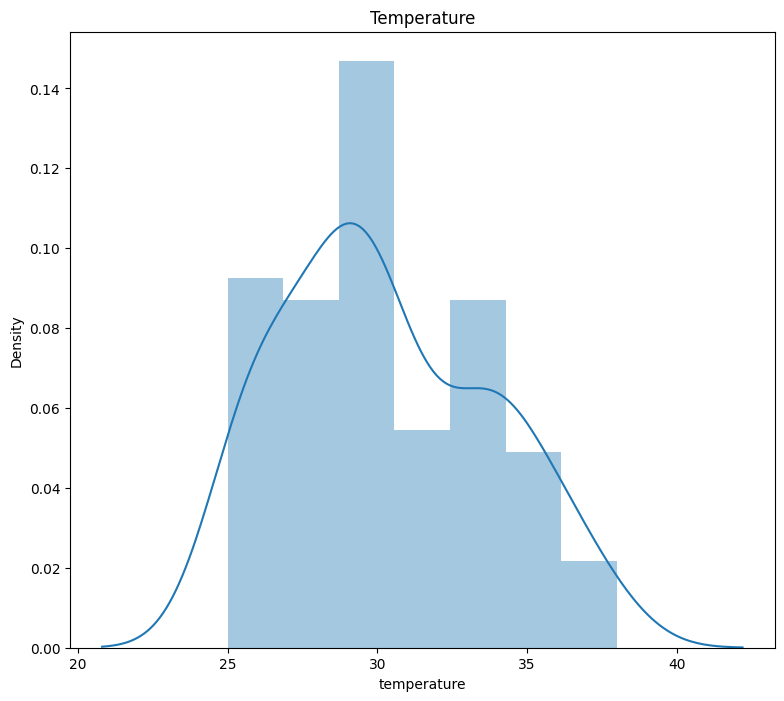

In [208]:
import warnings  # Importing the warnings library to manage warnings

# Ignore warnings to keep the output clean
warnings.filterwarnings("ignore")

# Set the figure size for the plot
plt.figure(figsize=(20, 8))

# Create a subplot layout with 1 row and 2 columns; we're currently working on the first subplot
plt.subplot(1, 2, 1)

# Set the title for the first subplot
plt.title('Temperature')

# Create a distribution plot for the 'temperature' column in the fertilizer_data DataFrame
sns.distplot(fertilizer_data.temperature)

# Display the plot
plt.show()

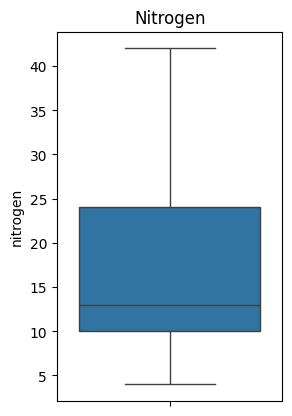

In [209]:
import warnings  # Importing the warnings library to manage warnings

# Create the second subplot in the previously defined figure layout
plt.subplot(1, 2, 2)

# Create a box plot for the 'nitrogen' column in the fertilizer_data DataFrame
sns.boxplot(fertilizer_data.nitrogen)

# Set the title for the box plot
plt.title('Nitrogen')

# Display the plot
plt.show()

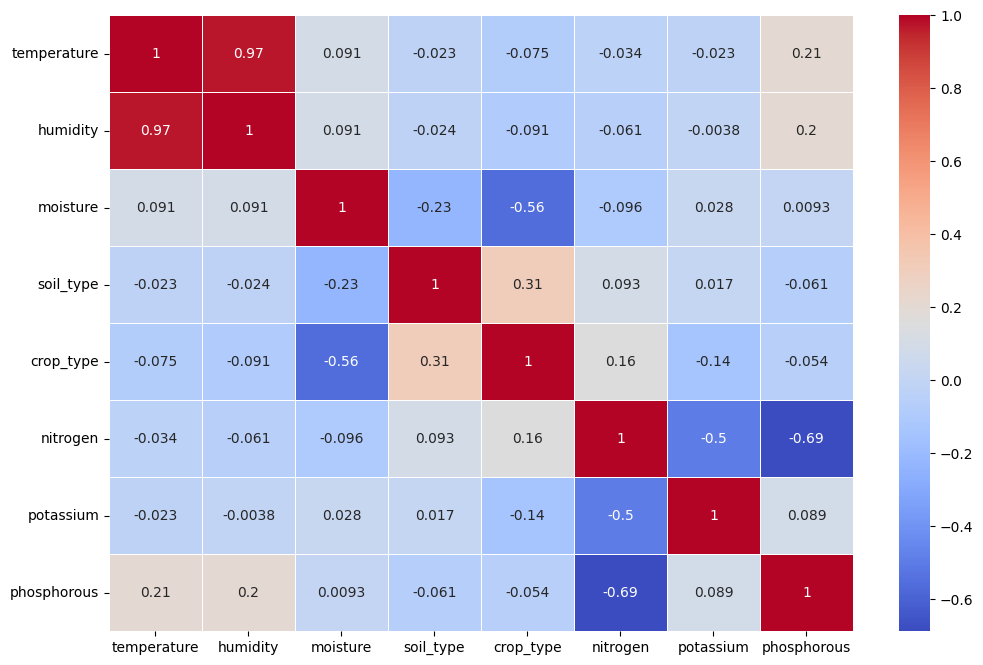

In [210]:
# Calculate the correlation matrix for selected columns in the fertilizer_data DataFrame
cor_matrix = fertilizer_data[['temperature', 'humidity', 'moisture', 'soil_type', 'crop_type', 'nitrogen', 'potassium', 'phosphorous']].corr()

# Set the size of the figure for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.show()

# Train the Model
Initialize and train the machine learning model using the training data.

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define the target and features
y = fertilizer_data['fertilizer_name'].copy()
X = fertilizer_data.drop(['fertilizer_name'], axis=1).copy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify columns for preprocessing
numerical_features = ['temperature', 'humidity', 'moisture', 'nitrogen', 'potassium', 'phosphorous']
categorical_features = ['soil_type', 'crop_type']

# Define the preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline with preprocessing and model training steps
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [212]:
# Fit the pipeline model (replace X_train and y_train with your actual data)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature', 'humidity',
                                                   'moisture', 'nitrogen',
                                                   'potassium',
                                                   'phosphorous']),
                                                 ('cat', OneHotEncoder(),
                                                  ['soil_type',
                                                   'crop_type'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [213]:
# Evaluate model performance on test data
model.score(X_test,y_test)

0.95

In [214]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function for splitting data

model.fit(X_train, y_train)  # Train the model using the training data

predictions = model.predict(X_test)  # Make predictions on the test data

In [215]:
# Display the predictions for review
predictions

array(['28-28', '20-20', '10/26/2026', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '17-17-17', 'Urea'], dtype=object)

In [216]:
X_train.head(1)  # Display the first row of the training feature matrix to inspect the input data structure

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous
49,33,64,51,0.0,0.0,5,9,29


In [217]:
from sklearn.metrics import classification_report  # Import the classification_report function to evaluate model performance

# Generate and print a classification report comparing true labels (y_test) with predicted labels
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

  10/26/2026       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



In [218]:
fertilizer_data.head()

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,26,52,38,0.0,0.0,37,0,0,Urea
1,29,52,45,1.0,1.0,12,0,36,DAP
2,34,65,62,2.0,2.0,7,9,30,14-35-14
3,32,62,34,3.0,3.0,22,0,20,28-28
4,28,54,46,4.0,4.0,35,0,0,Urea


In [219]:
# Define the input data as a DataFrame with specific feature values for the model
input_data_model = pd.DataFrame(
    [[30, 52, 38, 0, 1, 37, 0, 0]],  # Example values for temperature, humidity, moisture, etc.
    columns=['temperature', 'humidity', 'moisture', 'soil_type', 'crop_type', 'nitrogen', 'potassium', 'phosphorous']  # Specify the feature names
)

In [220]:
input_data_model  # Display the DataFrame containing the input data for the model

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous
0,30,52,38,0,1,37,0,0


In [221]:
 # Predict the target variable using the input data for the model
model.predict(input_data_model)

array(['Urea'], dtype=object)

# Save the Model
Serialize the trained model for later use.

In [222]:
import pickle as pk # Import the pickle module for serializing and deserializing Python objects

In [223]:
pk.dump(model,open('model.pkl','wb')) # Serialize and save the trained model to a file named 'model.pkl' in write-binary mode